In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Chemin vers le fichier CSV
fichier_csv = 'Stage-3.csv'

# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv(fichier_csv)

# Afficher les 5 premières lignes
print(df)


    Numéro  Position  Pression (Torr)  Ch. Magnétique (T) Gaz
0       33       0.0              0.0                 0.0  N2
1       34       1.4              5.0                 0.0  N2
2       35       2.0              5.0                 0.0  N2
3       36       2.6              5.0                 0.0  N2
4       37       1.4              5.0                 1.5  N2
5       38       2.0              5.0                 1.5  N2
6       39       2.6              5.0                 1.5  N2
7       41       1.4              1.0                 0.0  N2
8       42       2.0              1.0                 0.0  N2
9       43       2.6              1.0                 0.0  N2
10      44       1.4              1.0                 2.0  N2
11      45       2.0              1.0                 2.0  N2
12      46       2.6              1.0                 2.0  N2
13      47       1.4              1.0                 2.0  N2
14      48       2.0              1.0                 2.0  N2
15      

Entrez le nombre de graphiques à générer :  10


Configuration du graphique 1 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  1


Fichier choisi : ../Stage_Pic/C47734.tif
Position = 1.4
xi = 0.3, xf = 2.6


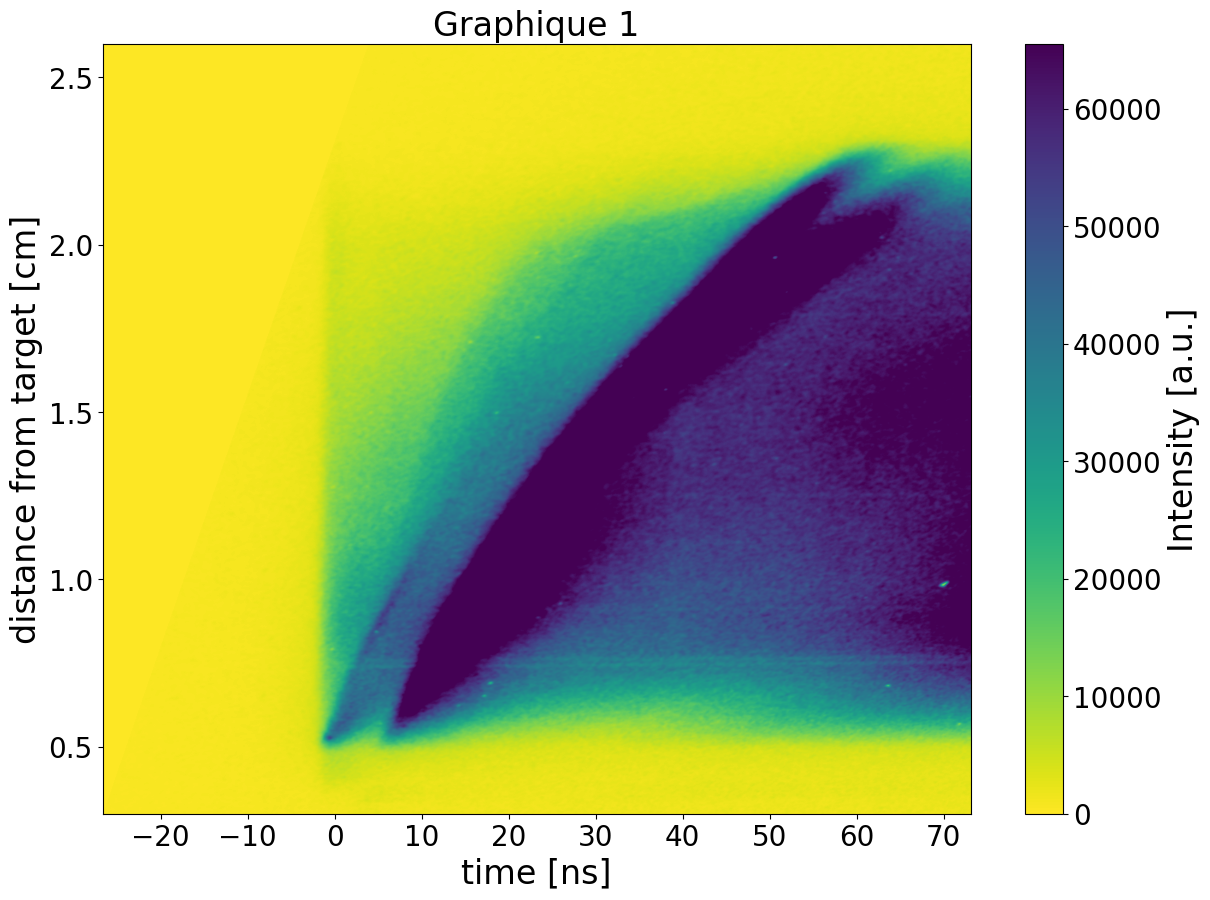

Configuration du graphique 2 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  2


Fichier choisi : ../Stage_Pic/C47735.tif
Position = 2.0
xi = 0.9, xf = 3.32


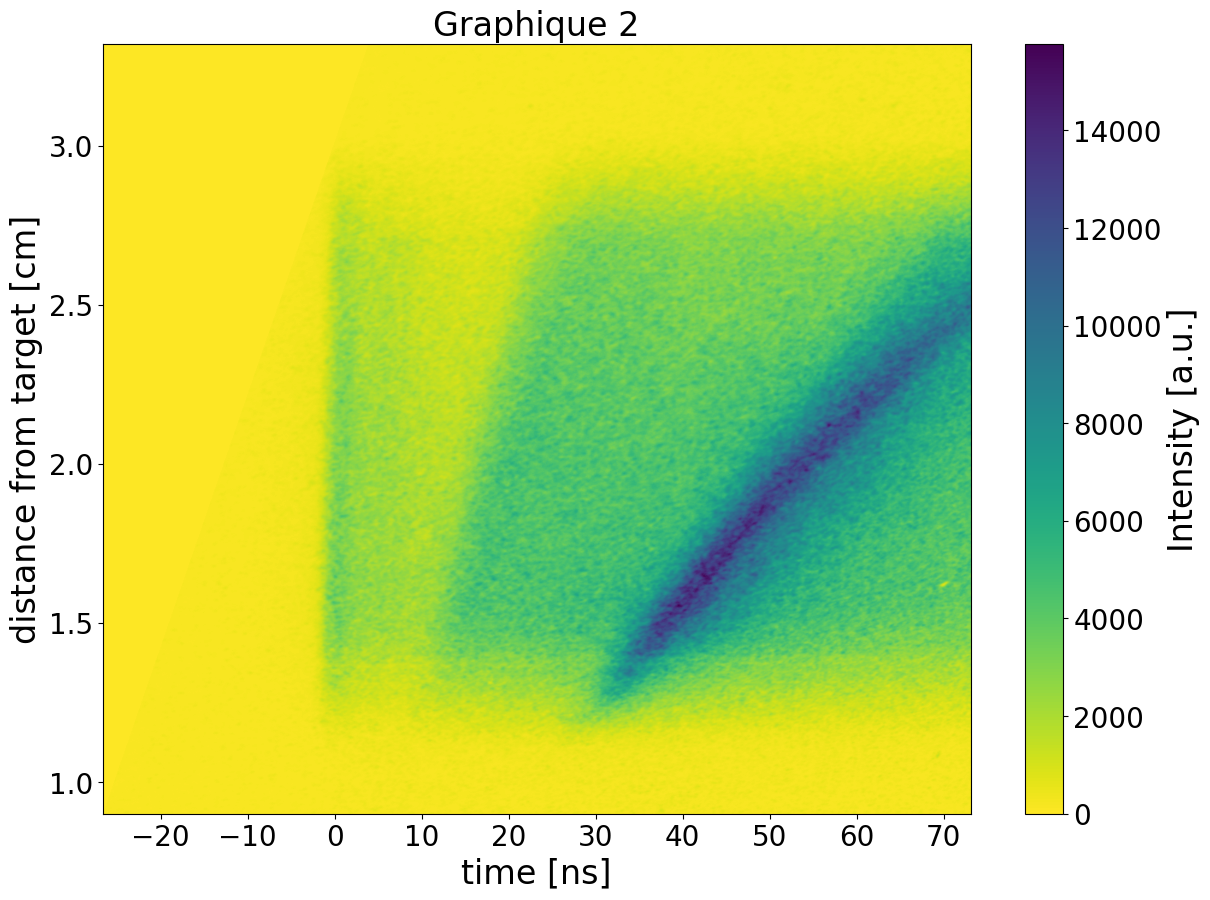

Configuration du graphique 3 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  4


Fichier choisi : ../Stage_Pic/C47737.tif
Position = 1.4
xi = 0.3, xf = 2.6


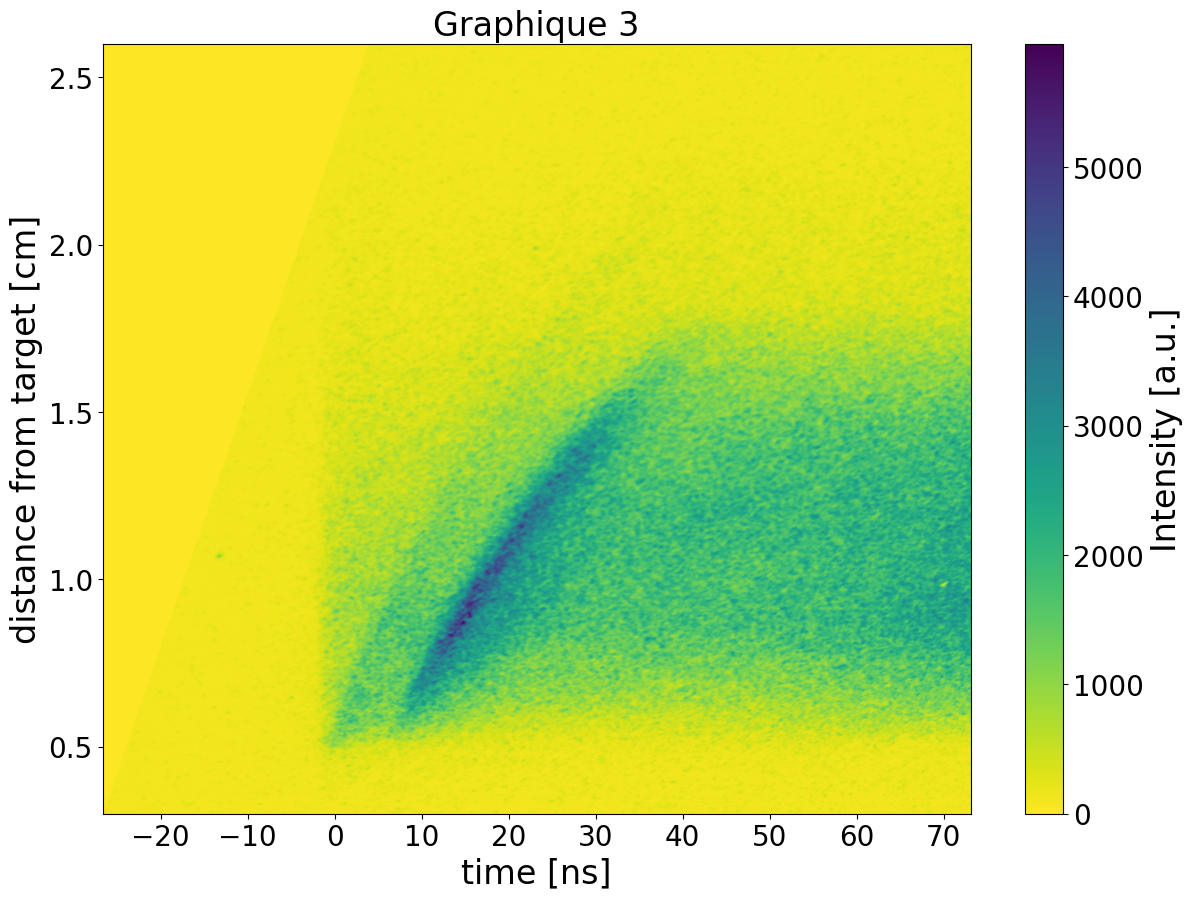

Configuration du graphique 4 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  7


Fichier choisi : ../Stage_Pic/C47741.tif
Position = 1.4
xi = 0.3, xf = 2.6


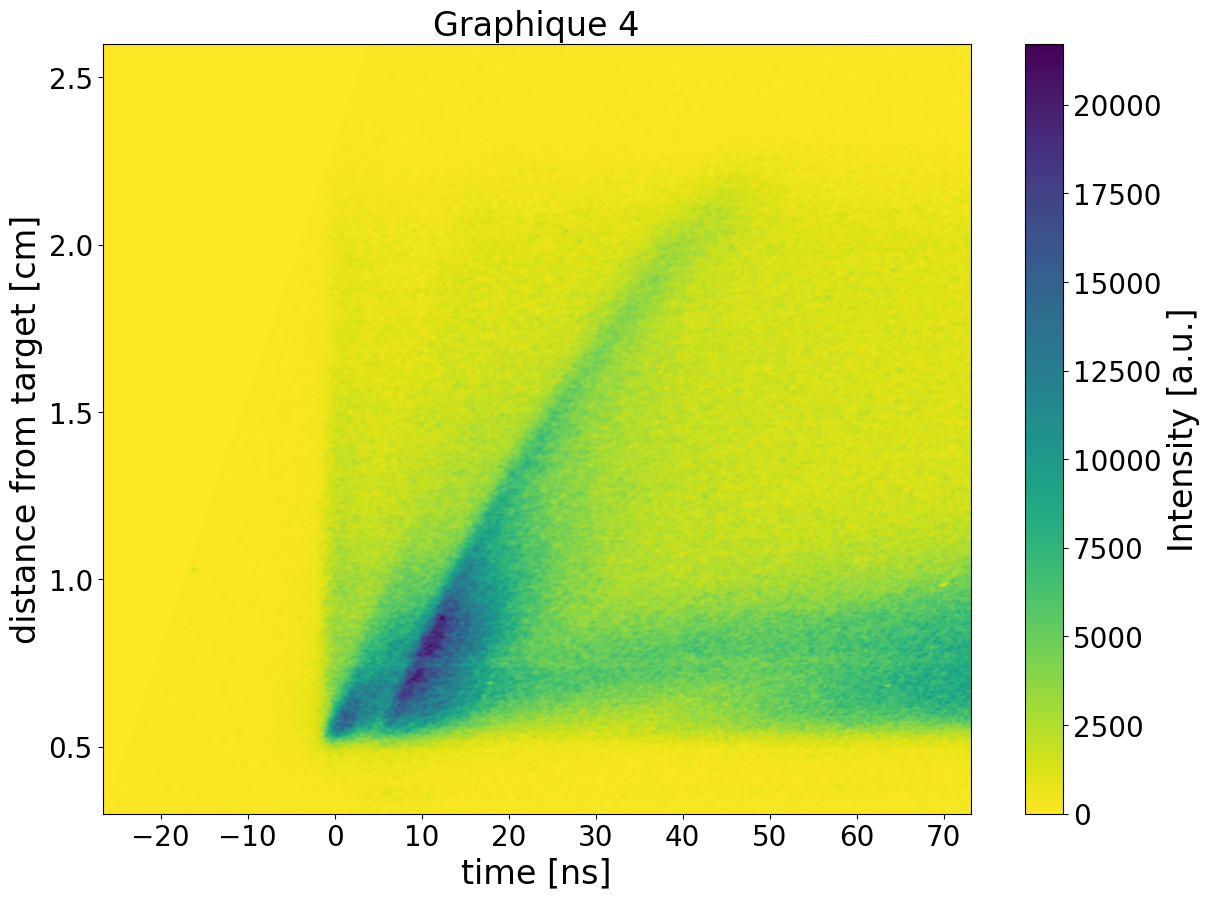

Configuration du graphique 5 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  11


Fichier choisi : ../Stage_Pic/C47745.tif
Position = 2.0
xi = 0.9, xf = 3.32


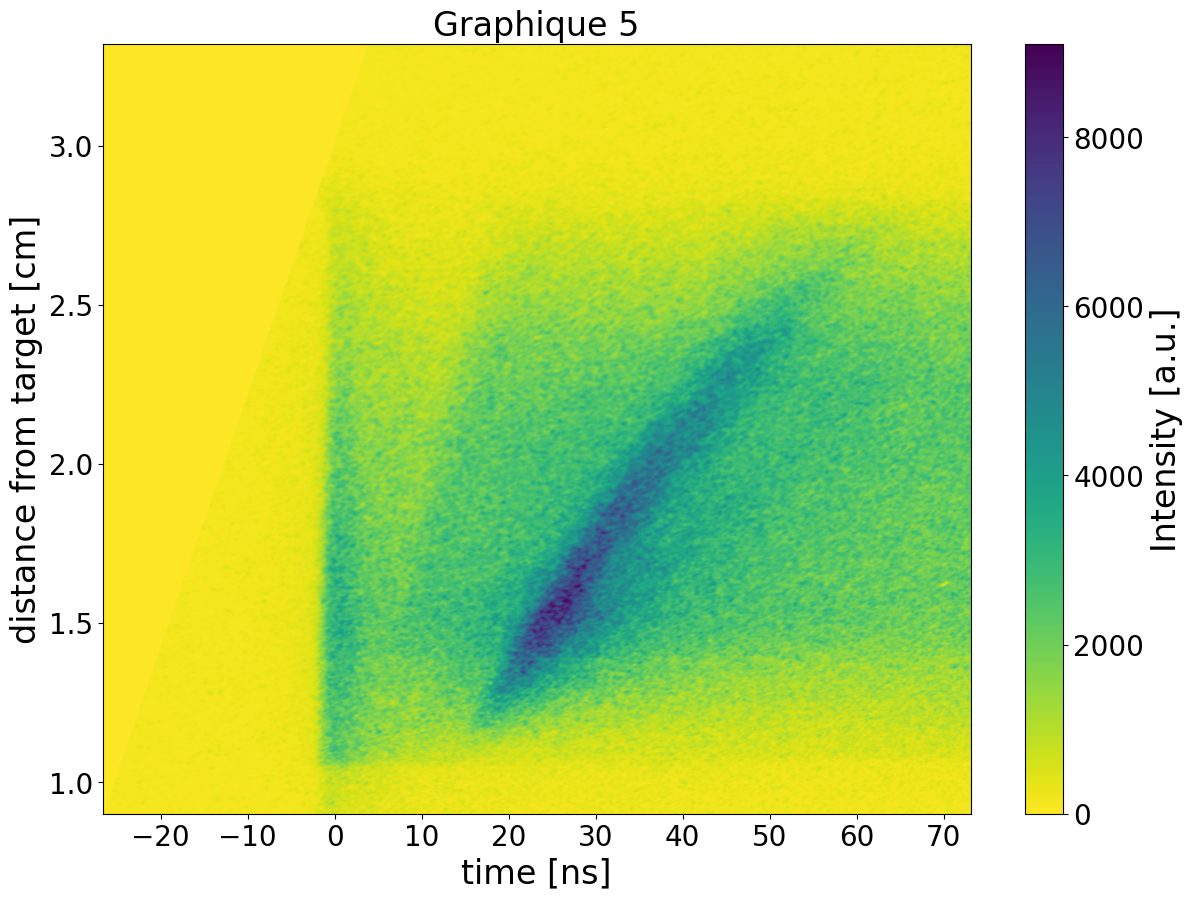

Configuration du graphique 6 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  14


Fichier choisi : ../Stage_Pic/C47748.tif
Position = 2.0
xi = 0.9, xf = 3.32


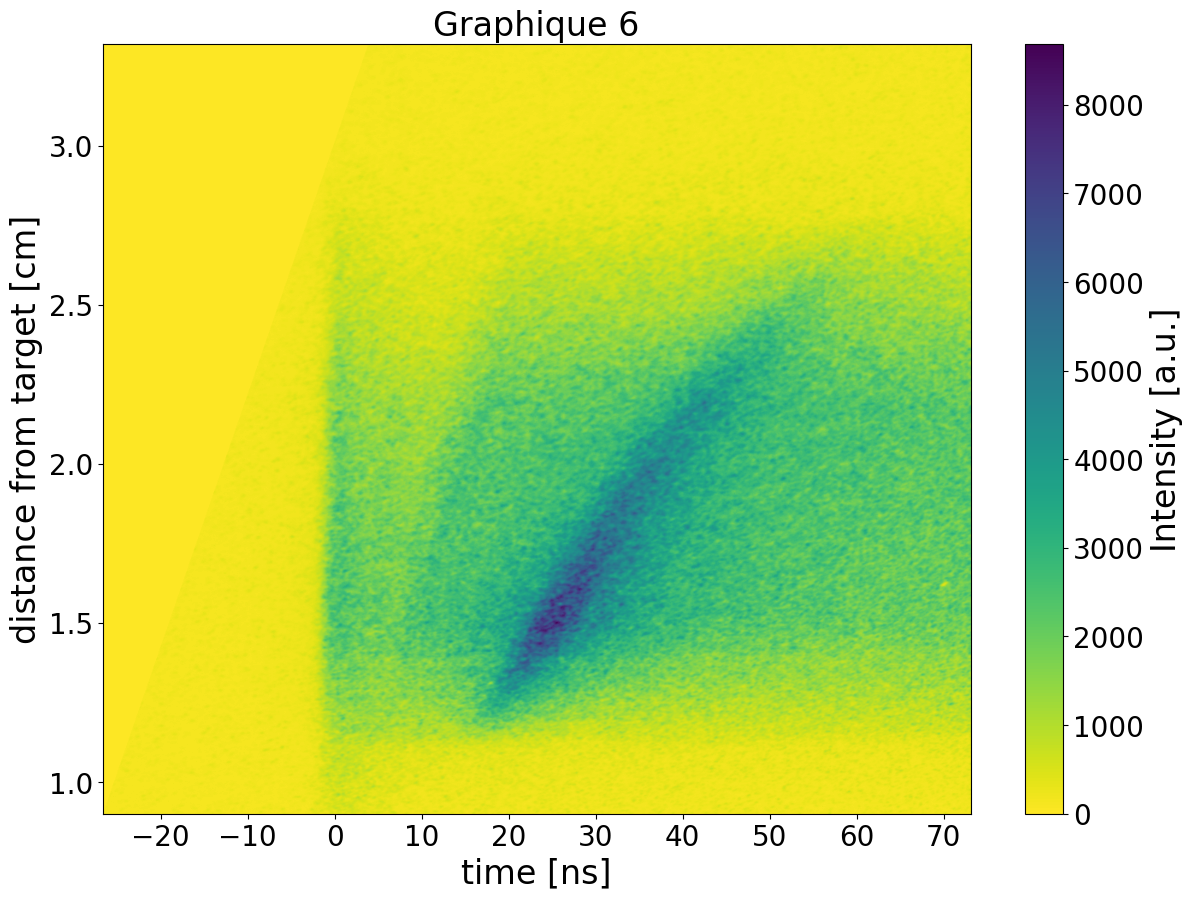

Configuration du graphique 7 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  17


Fichier choisi : ../Stage_Pic/C47752.tif
Position = 2.0
xi = 0.9, xf = 3.32


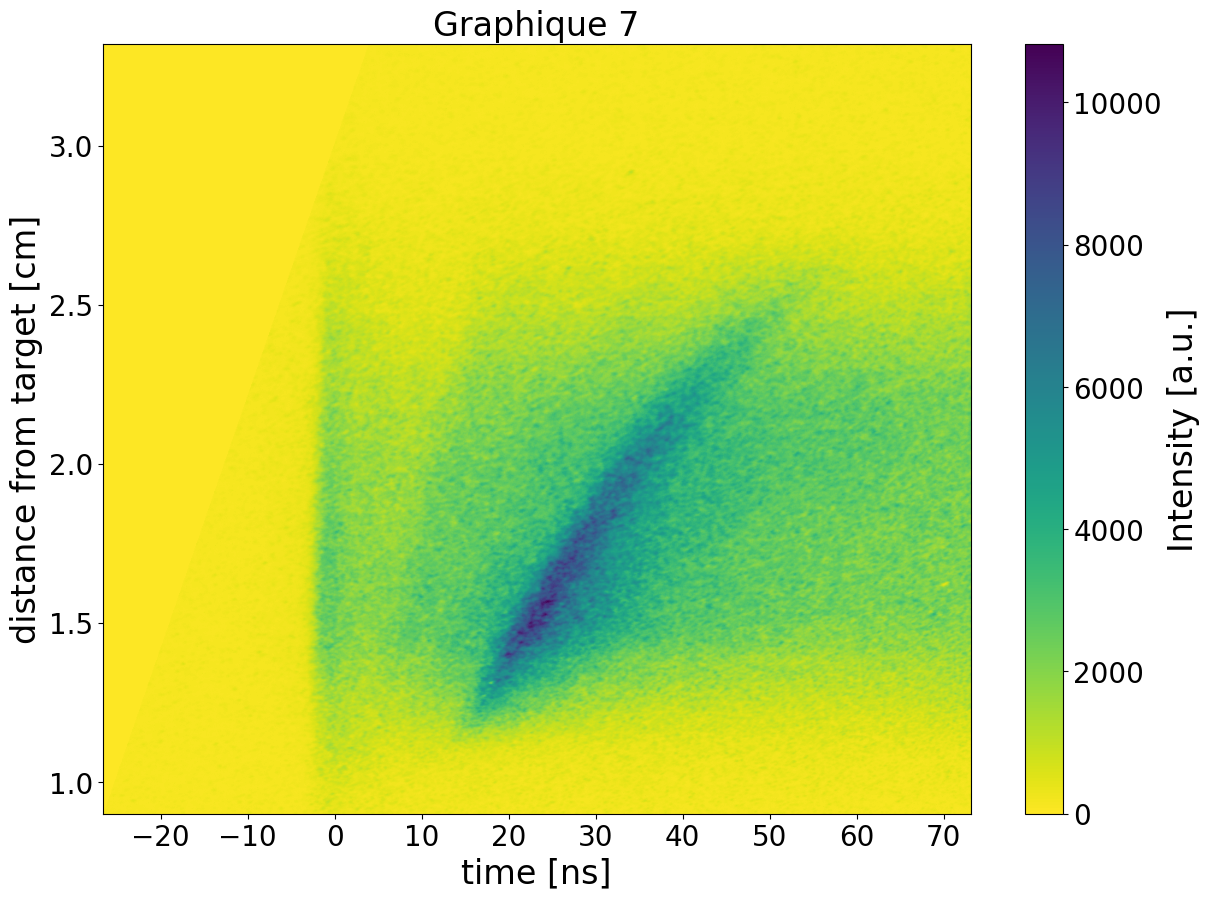

Configuration du graphique 8 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  18


Fichier choisi : ../Stage_Pic/C47753.tif
Position = 2.6
xi = 1.5, xf = 3.9


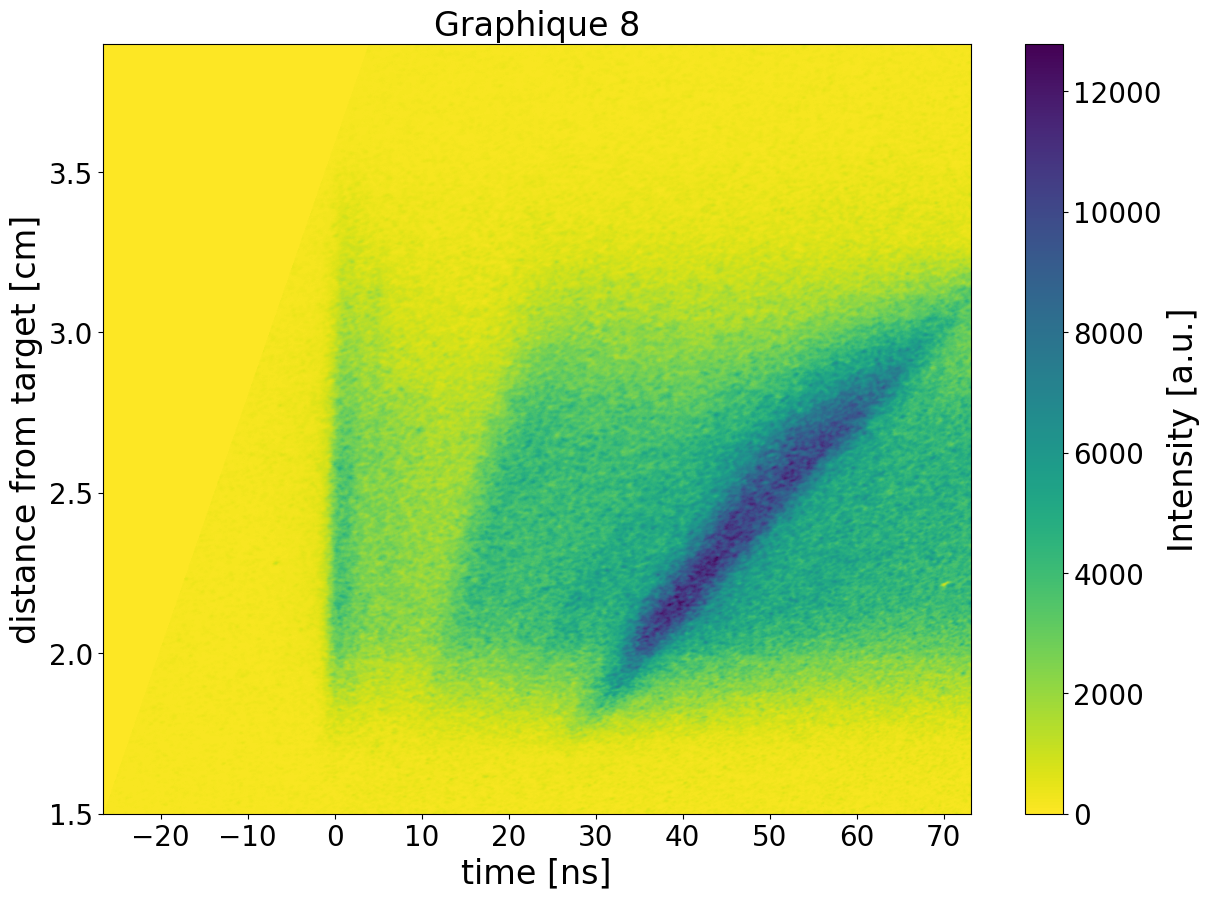

Configuration du graphique 9 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  22


Fichier choisi : ../Stage_Pic/C47757.tif
Position = 1.4
xi = 0.3, xf = 2.6


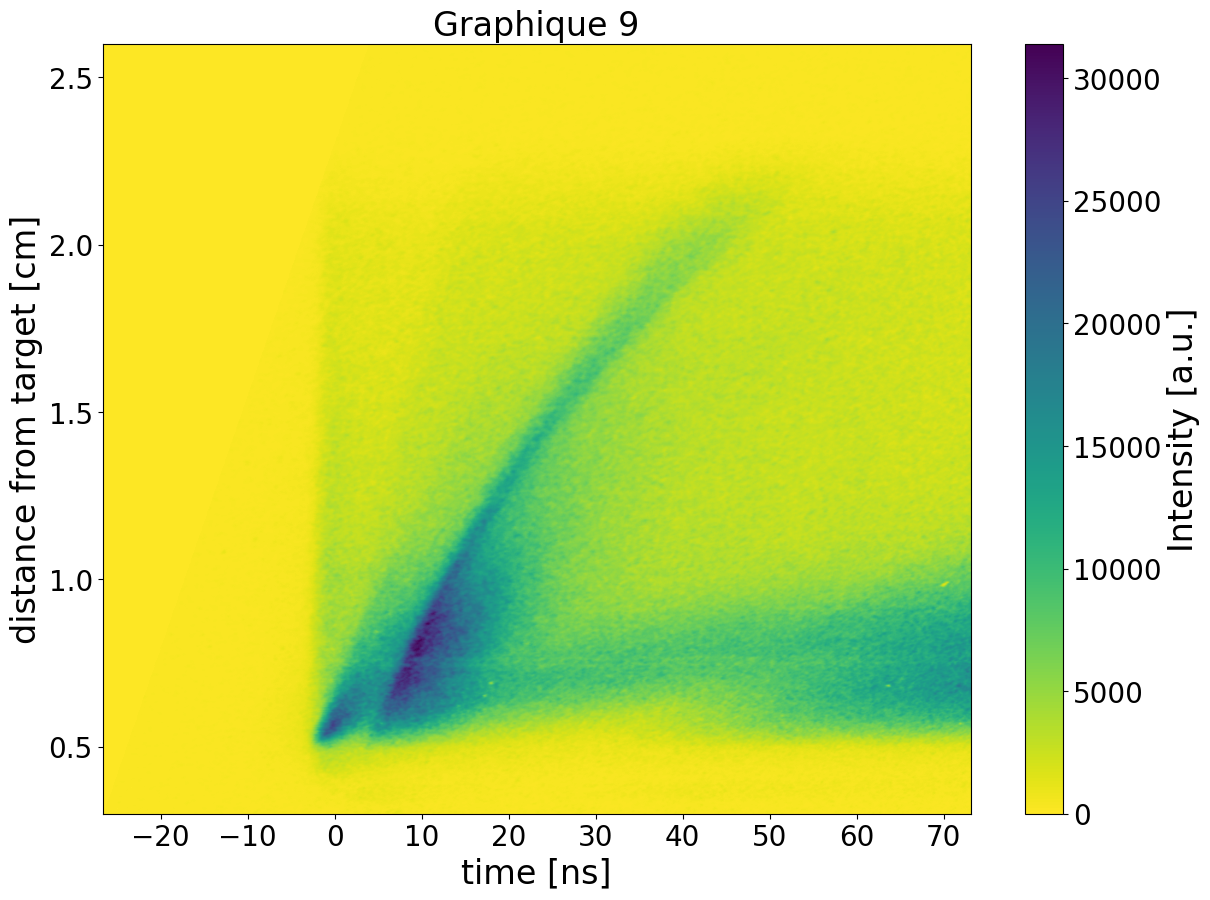

Configuration du graphique 10 :


Entrez le numéro de ligne à utiliser (index du fichier CSV) :  23


Fichier choisi : ../Stage_Pic/C47758.tif
Position = 2.0
xi = 0.9, xf = 3.32


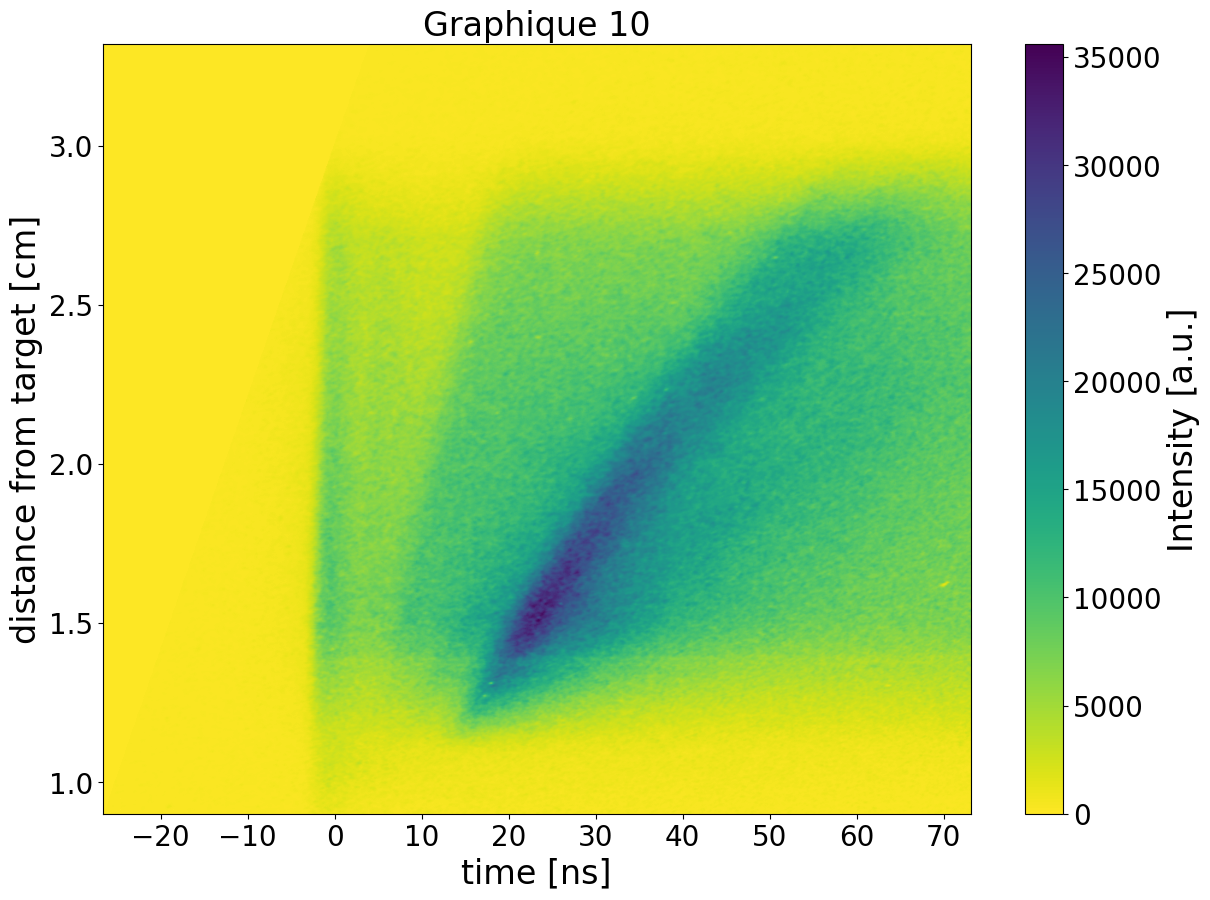

In [3]:
def load_image(file_path):
    # Charger une image .tif en tant que matrice NumPy
    img = Image.open(file_path)
    img_data = np.array(img)
    return img_data

# Demander à l'utilisateur le nombre de graphiques à générer
try:
    nombre_graphiques = int(input("Entrez le nombre de graphiques à générer : "))
    if nombre_graphiques <= 0:
        raise ValueError("Le nombre de graphiques doit être supérieur à 0.")
except ValueError as e:
    print(f"Erreur : {e}")
    exit(1)

for i in range(nombre_graphiques):
    print(f"Configuration du graphique {i + 1} :")
    # Demander à l'utilisateur de choisir la ligne du DataFrame
    try:
        ligne_num = int(input("Entrez le numéro de ligne à utiliser (index du fichier CSV) : "))
        if ligne_num < 0 or ligne_num >= len(df):
            raise ValueError("Numéro de ligne hors de portée.")
    except ValueError as e:
        print(f"Erreur : {e}")
        continue

    # Extraire les données de la ligne choisie
    ligne = df.iloc[ligne_num]
    position = ligne['Position']
    numero = int(ligne['Numéro'])

    # Construire le chemin de l'image
    file_path = f"../Stage_Pic/C477{numero}.tif"
    print(f"Fichier choisi : {file_path}")

    # Définir les limites selon la position
    ti, tf = -26.67, 73.1  # ns
    if position == 1.4:
        xi, xf = 0.3, 2.6
    elif position == 2:
        xi, xf = 0.9, 3.32
    elif position == 2.6:
        xi, xf = 1.5, 3.9
    else:
        xi, xf = None, None

    print(f"Position = {position}")
    print(f"xi = {xi}, xf = {xf}")

    # Charger et transformer les données de l'image
    try:
        img_data = load_image(file_path)  # Charger l'image
        img_data = np.flip(img_data, axis=0)  # Retourner l'image si nécessaire
    except Exception as e:
        print(f"Erreur lors du chargement de l'image : {e}")
        continue

    # Générer et afficher le graphique
    plt.figure(figsize=(14, 10))
    plt.imshow(
        img_data,
        cmap='viridis_r',
        aspect='auto',
        extent=[ti, tf, xi, xf]
    )
    cbar = plt.colorbar()
    cbar.set_label('Intensity [a.u.]', fontsize=24)
    cbar.ax.tick_params(labelsize=20)

    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('time [ns]', fontsize=24)
    plt.ylabel('distance from target [cm]', fontsize=24)
    plt.title(f"Graphique {i + 1}", fontsize=24)
    plt.show()


In [ ]:
def distance_to_pixels(distance_cm, xi, xf, num_pixels=1343):
    
    # Calcul du facteur de conversion (pixels par cm)
    facteur_conversion =  (xf - xi)/num_pixels
    
    # Conversion de la distance
    distance_pixels = distance_cm * facteur_conversion
    return distance_pixels
